In [53]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('statevector_simulator')

In [54]:
from wordcloud import WordCloud
import numpy as np  
import pandas as pd # primary data structure library

In [84]:
reg = QuantumRegister(8, name='reg') # The quantum register of the qubits, in this case 8 qubits
reg_c = ClassicalRegister(8, name='regc') # Where the measurements of the qubits will be saved
qc = QuantumCircuit(reg, reg_c) 

In [85]:
#qc.reset(reg)          # write the value 0
qc.h(reg)              # put it into a superposition of 0 and 1
qc.measure(reg, reg_c) # read the result as a digital bit

In [86]:
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=5)
counts = result.get_counts(qc)

In [87]:
#print(outputstate)

In [88]:
qc.draw()   

┌───┐┌─┐                     
 reg_0: ┤ H ├┤M├─────────────────────
        ├───┤└╥┘┌─┐                  
 reg_1: ┤ H ├─╫─┤M├──────────────────
        ├───┤ ║ └╥┘┌─┐               
 reg_2: ┤ H ├─╫──╫─┤M├───────────────
        ├───┤ ║  ║ └╥┘┌─┐            
 reg_3: ┤ H ├─╫──╫──╫─┤M├────────────
        ├───┤ ║  ║  ║ └╥┘┌─┐         
 reg_4: ┤ H ├─╫──╫──╫──╫─┤M├─────────
        ├───┤ ║  ║  ║  ║ └╥┘┌─┐      
 reg_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├──────
        ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐   
 reg_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───
        ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 reg_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
regc: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

In [89]:
key, value = list(counts.items())[0] # key is de state of the system after the measuremnt, for example '11100001'
key

'11100001'

In [90]:
number = int(key, 2)  # The state is converted into a number
ASCII_Character = chr(number) # The number in  ASCII character
print('The random number is:',number, 'And the random ASCII character:',ASCII_Character)

The random number is: 225 And the random ASCII character: á


In [92]:
def Quantum_random_number_and_ASCII_Character_generator(n):
    
    reg = QuantumRegister(n, name='reg') # The quantum register of the n qubits
    reg_c = ClassicalRegister(n, name='regc')# Where the measurements of the qubits will be saved
    qc = QuantumCircuit(reg, reg_c) 
    
    qc.h(reg)              # put it into a superposition of 0 and 1
    qc.measure(reg, reg_c) # read the result as a digital bit
    
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    key, value = list(counts.items())[0]
    
    number = int(key, 2)
    ASCII_Character = chr(number)
    
    
    return ASCII_Character, number

In [93]:
Quantum_random_ASCII_Character(8)[1]

225

In [94]:
L  = []
num = []
counter = []
for x in range(400):
    string = Quantum_random_ASCII_Character(8)[0]
    number = Quantum_random_ASCII_Character(8)[1]
    L.append(string)
    num.append(number)
    counter.append(x)

df1 = pd.DataFrame(counter, columns=['Counter'])
df2 = pd.DataFrame(L, columns=['Random_Character'])
df3 = pd.DataFrame(num, columns=['Random_Number'])

In [95]:
re = df1.join(df2)
result = re.join(df3)

In [118]:
result.head()

,Counter,Random_Character,Random_Number
0,0,á,225
1,1,á,225
2,2,á,225
3,3,,4
4,4,,4


<AxesSubplot:xlabel='Iteration', ylabel='Randon Number'>

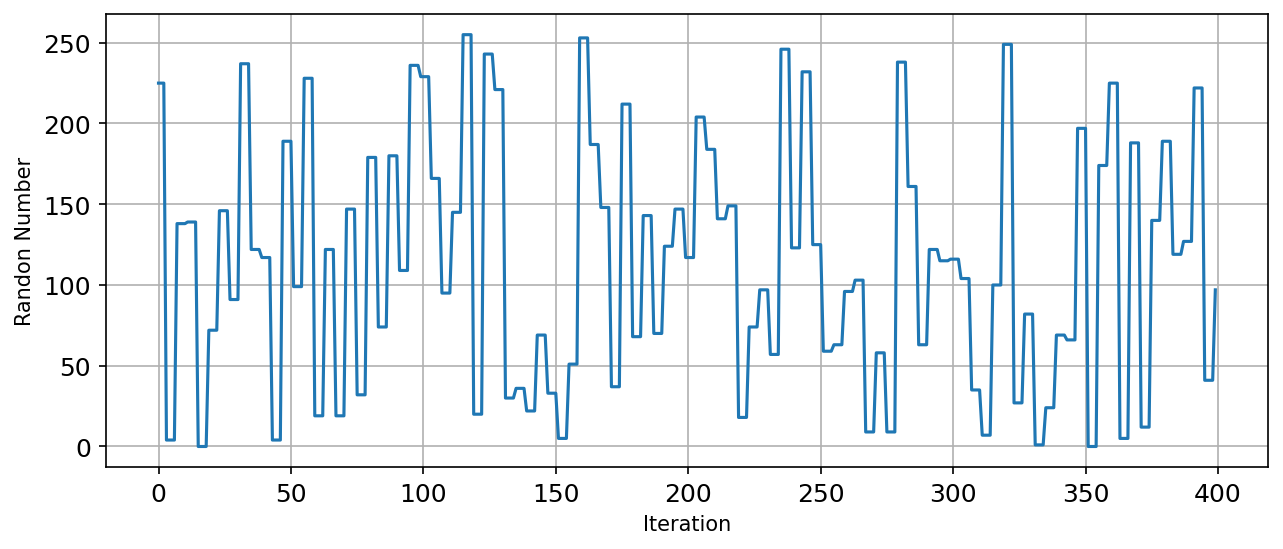

In [129]:
result.plot(x='Counter', y='Random_Number', figsize=(10,4), xlabel='Iteration', ylabel='Randon Number', legend = False, grid = True, fontsize = 12)

In [117]:
result['Random_Number'].describe()

count    400.000000
mean     112.870000
std       75.786226
min        0.000000
25%       48.500000
50%      115.000000
75%      174.000000
max      255.000000
Name: Random_Number, dtype: float64

In [119]:
#generate the word cloud
wordcloud2 = WordCloud(background_color='white').generate(' '.join(result['Random_Character']))


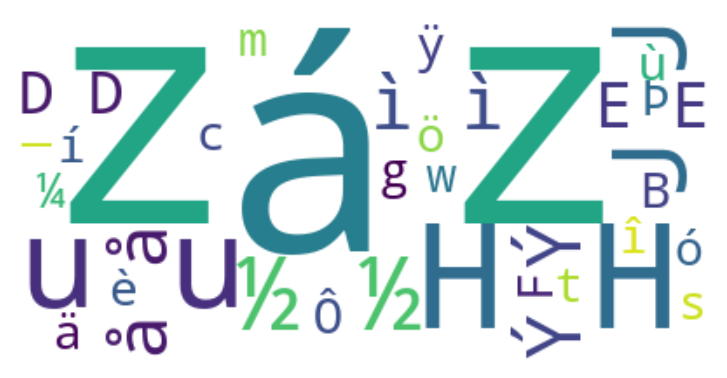

In [130]:
# display the word cloud
plt.imshow(wordcloud2 , interpolation='bilinear')
plt.axis('off')
plt.show()